In [1]:
import pandas as pd
import numpy as np
import io
from google.colab import files

uploaded = files.upload()

filename = next(iter(uploaded))
df = pd.read_csv(filename)

print(df.head())

Saving advisorsmith_cost_of_living_index.csv to advisorsmith_cost_of_living_index.csv
         City State  Cost of Living Index
0     Abilene    TX                  89.1
1      Adrian    MI                  90.5
2       Akron    OH                  89.4
3  Alamogordo    NM                  85.8
4      Albany    GA                  87.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  510 non-null    object 
 1   State                 510 non-null    object 
 2   Cost of Living Index  510 non-null    float64
dtypes: float64(1), object(2)
memory usage: 12.1+ KB
None


In [ ]:
print(df.describe())


       Cost of Living Index
count             510.00000
mean               96.54098
std                13.44205
min                80.00000
25%                88.22500
50%                91.90000
75%               100.70000
max               178.60000


In [ ]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
City                    0
State                   0
Cost of Living Index    0
dtype: int64


In [ ]:
df = df.dropna()
df = df.drop_duplicates()

In [ ]:
#check if 'Cost of Living Index' is numeric

df['Cost of Living Index'] = pd.to_numeric(df['Cost of Living Index'], errors='coerce')


In [ ]:
#create a new column for cost category
def categorize_cost(index):
    if index < 90:
        return 'Low'
    elif index < 100:
        return 'Medium'
    else:
        return 'High'

In [ ]:
df['Cost Category'] = df['Cost of Living Index'].apply(categorize_cost)


In [ ]:
state_avg = df.groupby('State')['Cost of Living Index'].mean().sort_values(ascending=False)
print("\nAverage Cost of Living Index by State:")
print(state_avg)


Average Cost of Living Index by State:
State
HI    154.575000
CA    125.746667
DC    120.100000
MA    114.550000
VT    112.800000
RI    111.500000
AK    109.300000
CT    108.560000
CO    108.300000
WA    107.023529
OR    106.208333
NH    105.575000
MT    105.400000
NV    103.700000
NJ    103.400000
ME    102.675000
DE    101.300000
FL    101.264000
MD    101.120000
AZ    100.387500
UT     99.960000
MN     98.114286
NY     97.038889
WY     95.550000
ID     94.966667
VA     94.709091
SD     93.500000
PA     93.452000
SC     93.409091
NE     92.133333
GA     91.900000
NC     91.840000
ND     91.475000
WI     91.357895
TX     91.053333
NM     90.625000
TN     90.392857
MI     89.835000
IA     89.537500
AL     89.366667
OH     88.804545
LA     88.600000
KY     88.177778
IL     88.058333
MO     87.770000
KS     87.520000
IN     87.300000
AR     86.037500
MS     85.966667
OK     84.242857
WV     83.633333
Name: Cost of Living Index, dtype: float64


In [ ]:
#Identify outliers using IQR method
Q1 = df['Cost of Living Index'].quantile(0.25)
Q3 = df['Cost of Living Index'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Cost of Living Index'] < lower_bound) | (df['Cost of Living Index'] > upper_bound)]
print("\nOutliers:")
print(outliers)


Outliers:
                 City State  Cost of Living Index Cost Category
33    Barnstable Town    MA                 122.4          High
51             Boston    MA                 132.6          High
54            Bozeman    MT                 125.3          High
181              Hilo    HI                 136.9          High
210           Kahului    HI                 158.5          High
215             Kapaa    HI                 164.9          High
218          Key West    FL                 140.0          High
297              Napa    CA                 149.6          High
305          New York    NY                 128.0          High
308        Oak Harbor    WA                 125.2          High
370        Sacramento    CA                 120.3          High
373           Salinas    CA                 138.3          High
378         San Diego    CA                 136.2          High
379     San Francisco    CA                 178.6          High
380          San Jose    CA  

In [ ]:
print("\nFirst few rows of preprocessed data:")
print(df.head())


First few rows of preprocessed data:
         City State  Cost of Living Index Cost Category
0     Abilene    TX                  89.1           Low
1      Adrian    MI                  90.5        Medium
2       Akron    OH                  89.4           Low
3  Alamogordo    NM                  85.8           Low
4      Albany    GA                  87.3           Low


In [ ]:
# Step 10: Basic statistical summary
print("\nBasic Statistical Summary:")
print(df['Cost of Living Index'].describe())



Basic Statistical Summary:
count    510.00000
mean      96.54098
std       13.44205
min       80.00000
25%       88.22500
50%       91.90000
75%      100.70000
max      178.60000
Name: Cost of Living Index, dtype: float64


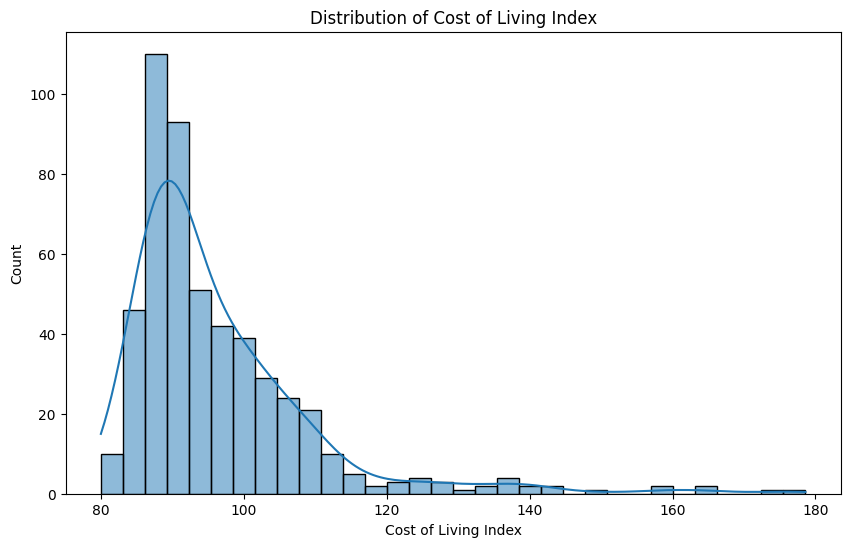

In [ ]:
#visualize

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Cost of Living Index'], kde=True)
plt.title('Distribution of Cost of Living Index')
plt.show()

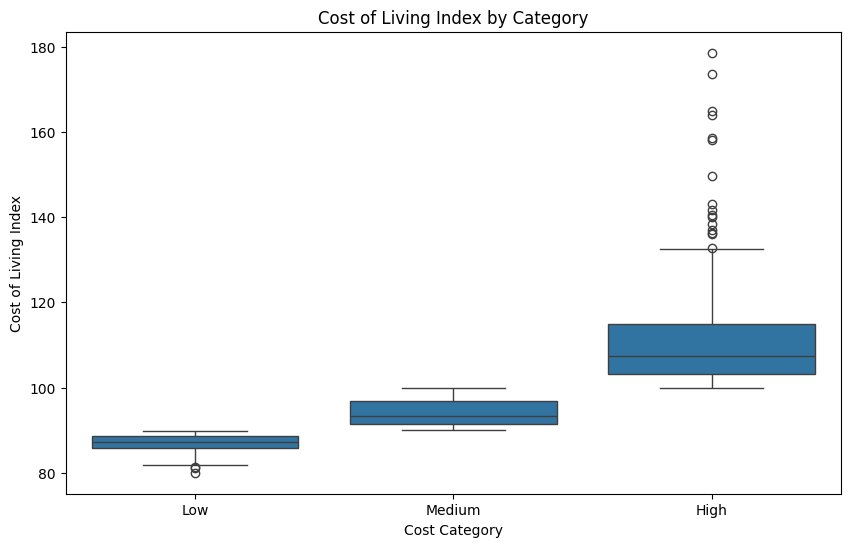

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cost Category', y='Cost of Living Index', data=df)
plt.title('Cost of Living Index by Category')
plt.show()

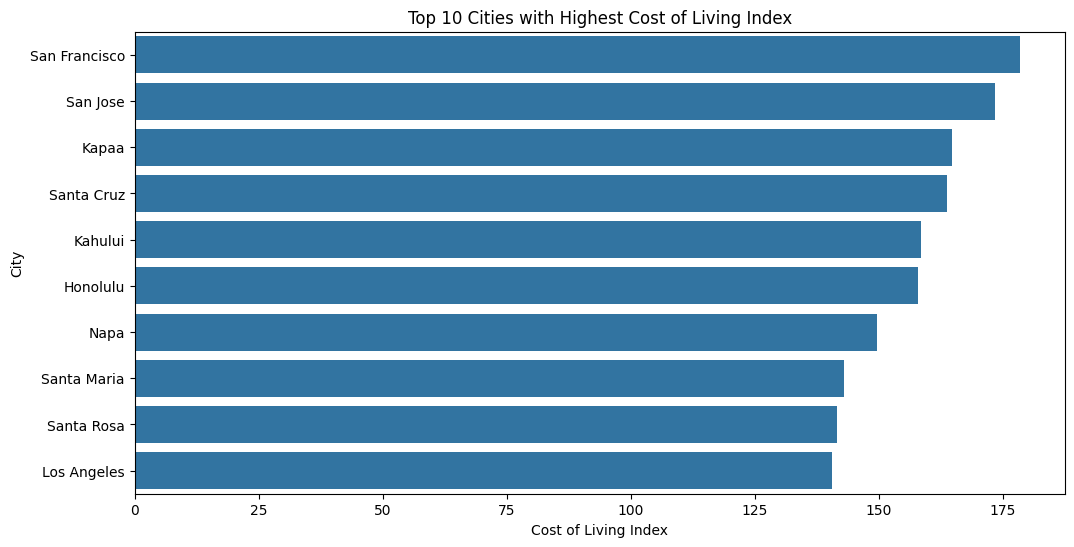

In [ ]:
#top 10 cities with highest cost of living
top_10 = df.nlargest(10, 'Cost of Living Index')
plt.figure(figsize=(12, 6))
sns.barplot(x='Cost of Living Index', y='City', data=top_10)
plt.title('Top 10 Cities with Highest Cost of Living Index')
plt.show()

In [ ]:
#save data
df.to_csv('preprocessed_costofliving.csv', index=False)
print("\nPreprocessing complete. Data saved to 'preprocessed_costofliving.csv'")


Preprocessing complete. Data saved to 'preprocessed_costofliving.csv'


In [ ]:
import pandas as pd
import plotly.express as px

# Make sure your DataFrame has these columns: City, State, Cost of Living Index
# If you need to preprocess, uncomment and modify these lines:
# df = pd.read_csv('your_data.csv')
# df = df[['City', 'State', 'Cost of Living Index']]

# Get the center point for each state for better visualization
us_state_centers = {
    'AL': (32.7794, -86.8287), 'AK': (64.0685, -152.2782),
    'AZ': (34.2744, -111.6602), 'AR': (34.8938, -92.4426),
    'CA': (37.1841, -119.4696), 'CO': (38.9972, -105.5478),
    'CT': (41.6219, -72.7273), 'DE': (38.9896, -75.5050),
    'FL': (28.6305, -82.4497), 'GA': (32.6415, -83.4426),
    'HI': (20.2927, -156.3737), 'ID': (44.3509, -114.6130),
    'IL': (40.0417, -89.1965), 'IN': (39.8942, -86.2816),
    'IA': (42.0751, -93.4960), 'KS': (38.4937, -98.3804),
    'KY': (37.5347, -85.3021), 'LA': (31.0689, -91.9968),
    'ME': (45.3695, -69.2428), 'MD': (39.0550, -76.7909),
    'MA': (42.2596, -71.8083), 'MI': (44.3467, -85.4102),
    'MN': (46.2807, -94.3053), 'MS': (32.7364, -89.6678),
    'MO': (38.3566, -92.4580), 'MT': (47.0527, -109.6333),
    'NE': (41.5378, -99.7951), 'NV': (39.3289, -116.6312),
    'NH': (43.6805, -71.5811), 'NJ': (40.1907, -74.6728),
    'NM': (34.4071, -106.1126), 'NY': (42.9538, -75.5268),
    'NC': (35.5557, -79.3877), 'ND': (47.4501, -100.4659),
    'OH': (40.2862, -82.7937), 'OK': (35.5889, -97.4943),
    'OR': (43.9336, -120.5583), 'PA': (40.8781, -77.7996),
    'RI': (41.6762, -71.5562), 'SC': (33.9169, -80.8964),
    'SD': (44.4443, -100.2263), 'TN': (35.8580, -86.3505),
    'TX': (31.4757, -99.3312), 'UT': (39.3055, -111.6703),
    'VT': (44.0687, -72.6658), 'VA': (37.5215, -78.8537),
    'WA': (47.3826, -120.4472), 'WV': (38.6409, -80.6227),
    'WI': (44.6243, -89.9941), 'WY': (42.9957, -107.5512)
}

# Add latitude and longitude to the DataFrame
df['Latitude'] = df['State'].map(lambda x: us_state_centers.get(x, (0,0))[0])
df['Longitude'] = df['State'].map(lambda x: us_state_centers.get(x, (0,0))[1])

# Create the choropleth map
fig = px.scatter_mapbox(df,
                       lat='Latitude',
                       lon='Longitude',
                       color='Cost of Living Index',
                       size='Cost of Living Index',
                       hover_name='City',
                       hover_data=['State', 'Cost of Living Index'],
                       color_continuous_scale='Viridis',
                       zoom=3,
                       title='Cost of Living Index by City',
                       mapbox_style='carto-positron')

# Update layout
fig.update_layout(
    title={'y':0.9,'x':0.5,'xanchor':'center','yanchor':'top'},
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Show the map
fig.show()

# Optional: Create a summary table of average cost by state
state_averages = df.groupby('State')['Cost of Living Index'].agg(['mean', 'min', 'max', 'count']).round(2)
print("\nState Cost of Living Summary:")
print(state_averages.sort_values('mean', ascending=False))


State Cost of Living Summary:
         mean    min    max  count
State                             
HI     154.57  136.9  164.9      4
CA     125.75  102.3  178.6     30
DC     120.10  120.1  120.1      1
MA     114.55  106.2  132.6      6
VT     112.80  112.8  112.8      1
RI     111.50  111.5  111.5      1
AK     109.30  107.9  110.7      2
CT     108.56  104.8  119.2      5
CO     108.30   92.2  127.8      8
WA     107.02   95.7  125.2     17
OR     106.21   97.1  116.5     12
NH     105.57  102.1  109.6      4
MT     105.40   91.1  125.3      6
NV     103.70  100.7  107.4      3
NJ     103.40   97.8  109.5      4
ME     102.68   98.0  113.0      4
DE     101.30  101.3  101.3      1
FL     101.26   93.1  140.0     25
MD     101.12   90.9  107.0      5
AZ     100.39   93.2  108.5      8
UT      99.96   95.2  105.9      5
MN      98.11   93.2  105.4      7
NY      97.04   88.3  128.0     18
WY      95.55   94.2   96.9      2
ID      94.97   90.8  103.3      6
VA      94.71   85.0  10

In [3]:
import pandas as pd

# Define a function to categorize CLI levels
def categorize_cli(index):
    if index > 100:
        return 'High'
    elif index < 100:
        return 'Low'
    else:
        return 'Average'

# Apply the function to create a new column 'Cost of Living Level'
df['Cost of Living Level'] = df['Cost of Living Index'].apply(categorize_cli)

# Display the first few rows to verify
print(df.head(20))


           City State  Cost of Living Index Cost of Living Level
0       Abilene    TX                  89.1                  Low
1        Adrian    MI                  90.5                  Low
2         Akron    OH                  89.4                  Low
3    Alamogordo    NM                  85.8                  Low
4        Albany    GA                  87.3                  Low
5        Albany    OR                 105.4                 High
6        Albany    NY                 100.1                 High
7   Albertville    AL                  90.9                  Low
8   Albuquerque    NM                  92.9                  Low
9    Alexandria    LA                  86.2                  Low
10    Allentown    PA                  98.9                  Low
11      Altoona    PA                  90.8                  Low
12     Amarillo    TX                  88.2                  Low
13         Ames    IA                  91.5                  Low
14    Anchorage    AK    

In [5]:
import os

# Get and print the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# Save the updated DataFrame to a CSV file
df.to_csv('updated_cost_of_living_index.csv', index=False)

print("File saved as 'updated_cost_of_living_index.csv' in the current directory.")


Current Directory: /content
File saved as 'updated_cost_of_living_index.csv' in the current directory.


In [7]:
# Create a download link for the file

from google.colab import files

# Save the file
df.to_csv('updated_cost_of_living_index.csv', index=False)

# Create a download link
files.download('updated_cost_of_living_index.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>